In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [18]:
from google.colab import files
uploaded = files.upload()


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data (1).csv


In [19]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [20]:
df1.shape

(13320, 9)

In [21]:
df1.groupby('area_type')['area_type'].agg('count')


,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [22]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [23]:
df3=df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [24]:
df3.shape

(13246, 5)

In [25]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [26]:
df3['bhk']=df3['size'].apply(lambda x: x.split(' ')[0])

/tmp/ipython-input-2441734909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: x.split(' ')[0])


In [27]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [28]:
df3['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [29]:
df3['bhk'].dtype

dtype('O')

In [30]:
df3['bhk'].unique()[:50]

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [31]:
# Extract numbers and convert to float
df3['bhk'] = df3['bhk'].astype(str).str.extract('(\d+)').astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3631868365.py:2: SyntaxWarning: invalid escape sequence '\d'
  df3['bhk'] = df3['bhk'].astype(str).str.extract('(\d+)').astype(float)
/tmp/ipython-input-3631868365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['bhk'].astype(str).str.extract('(\d+)').astype(float)


In [32]:
df3[df3['bhk'] > 20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0


In [33]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [34]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [35]:
df3[df3['total_sqft'].apply(is_float)].head(15)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
5,Whitefield,2 BHK,1170,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6.0


In [36]:
df3[~df3['total_sqft'].apply(is_float)].head(15)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9.0
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2.0
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4.0


In [37]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [38]:
convert_sqft_to_num('2166')

2166.0

In [39]:
convert_sqft_to_num('1015 - 1540')

1277.5

In [40]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(35)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0


In [41]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


In [42]:
len(df5.location.unique())

1304

In [43]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [44]:
len(location_stats[location_stats<=10])

1052

In [45]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Kalkere,10
Sadashiva Nagar,10
BTM 1st Stage,10
Basapura,10
Gunjur Palya,10
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [46]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [47]:
df5.head(200)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
197,other,3 Bedroom,1783.0,3.0,115.00,3.0,6449.803702
198,HSR Layout,3 BHK,1400.0,3.0,56.00,3.0,4000.000000
199,Nagasandra,2 BHK,980.0,2.0,48.00,2.0,4897.959184
200,EPIP Zone,2 BHK,1285.0,2.0,82.00,2.0,6381.322957


In [48]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [49]:
df5.shape

(13246, 7)

In [50]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [51]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [52]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out
df7=remove_pps_outliers(df6)
df7.shape



(10241, 7)

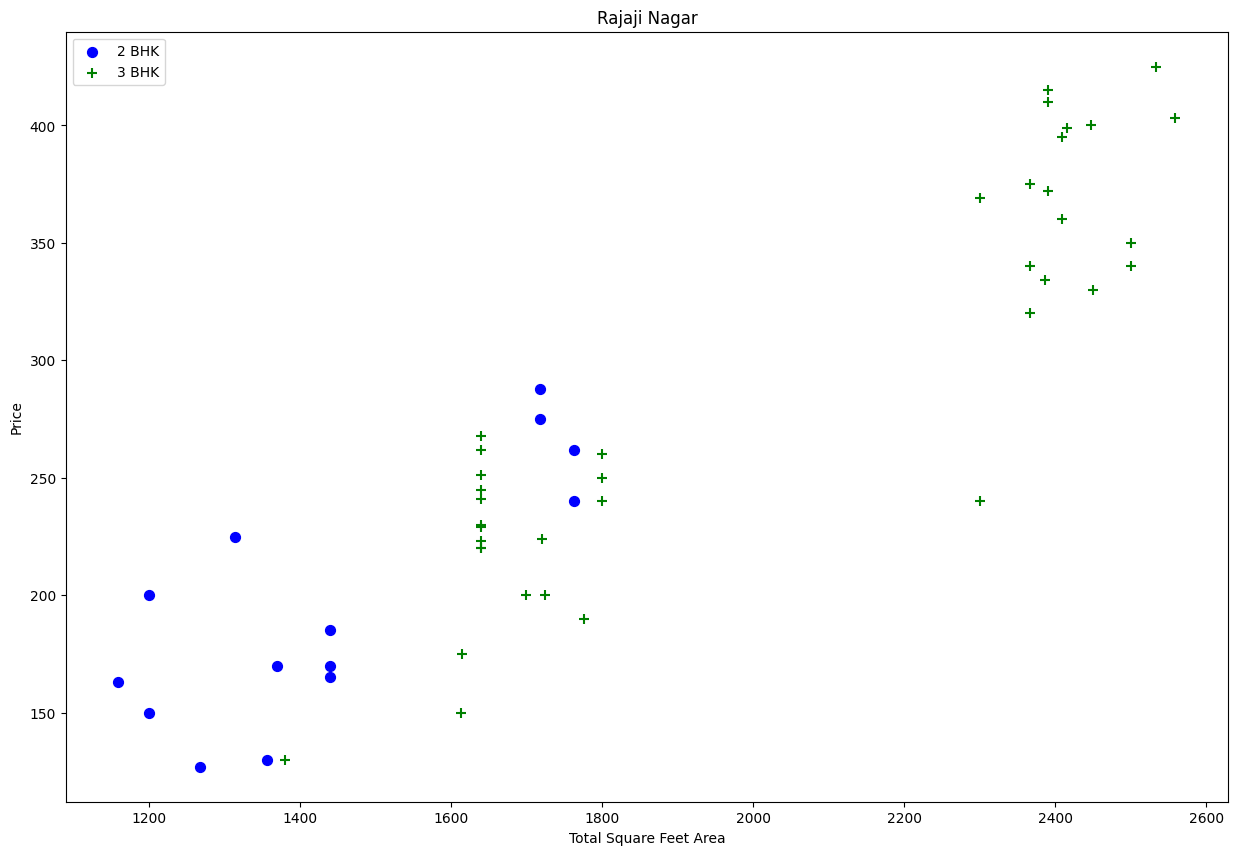

In [53]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

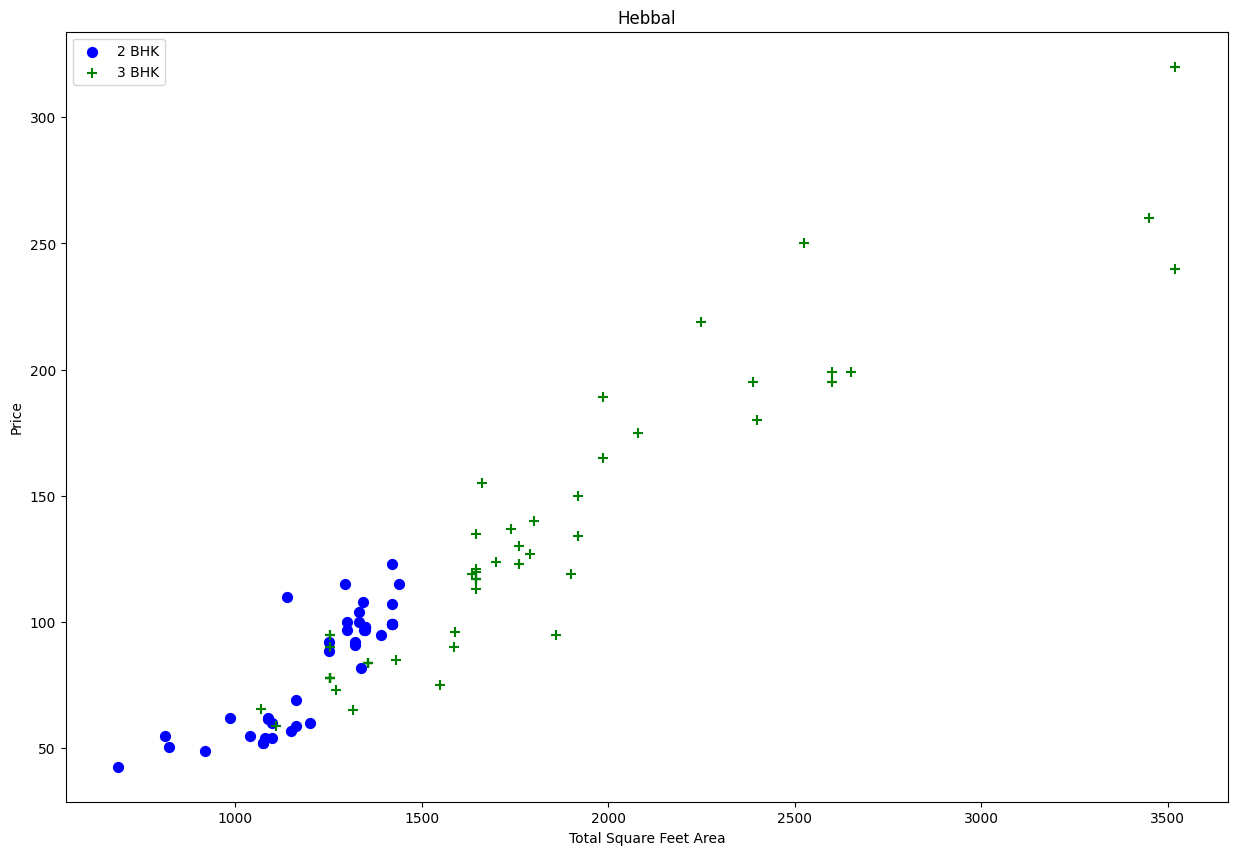

In [54]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Hebbal")

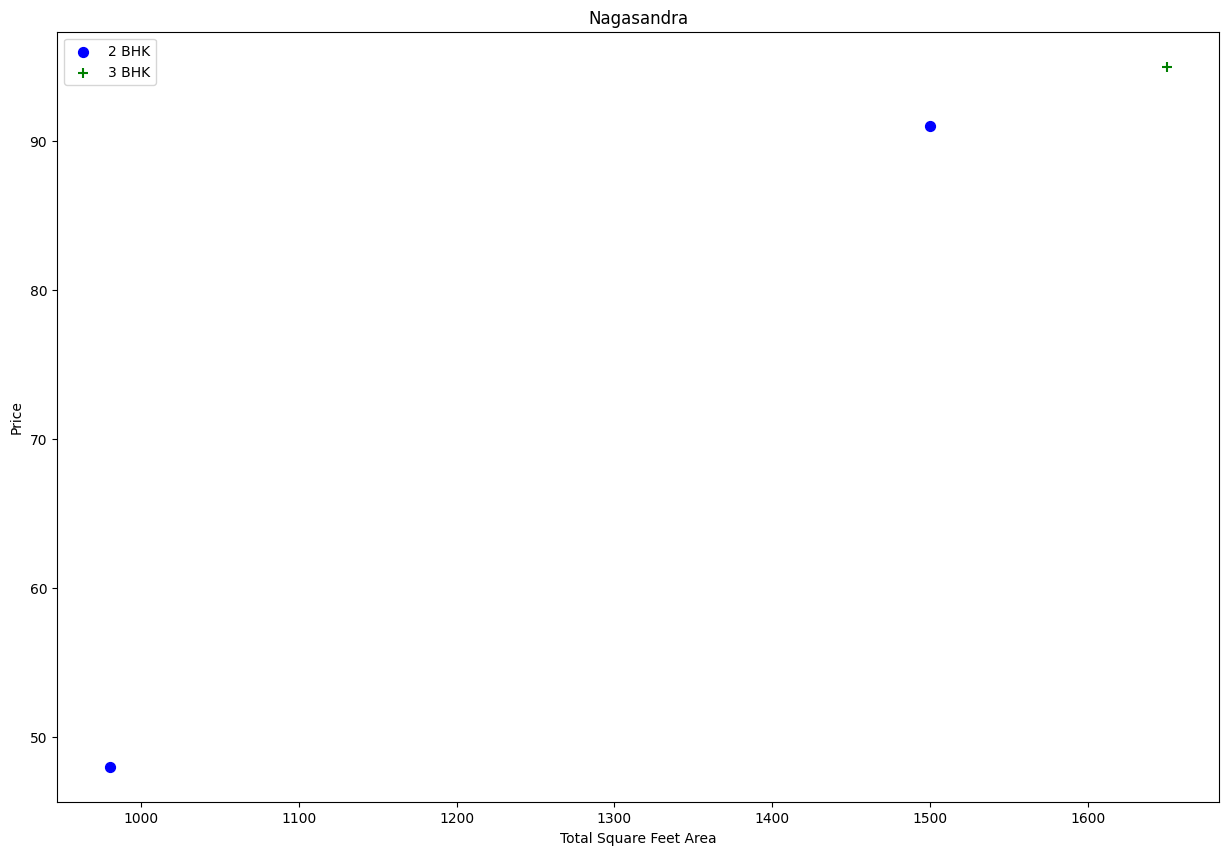

In [55]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Nagasandra")

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

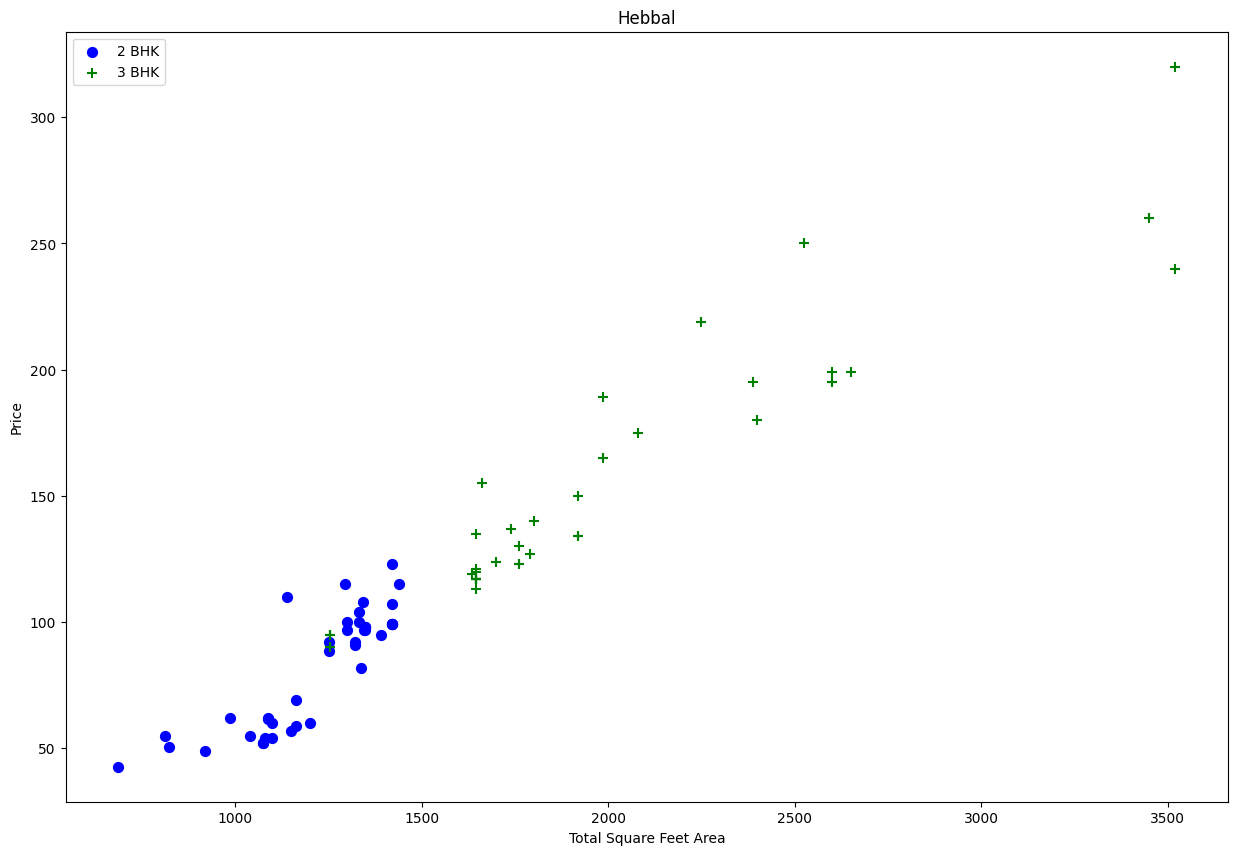

In [57]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

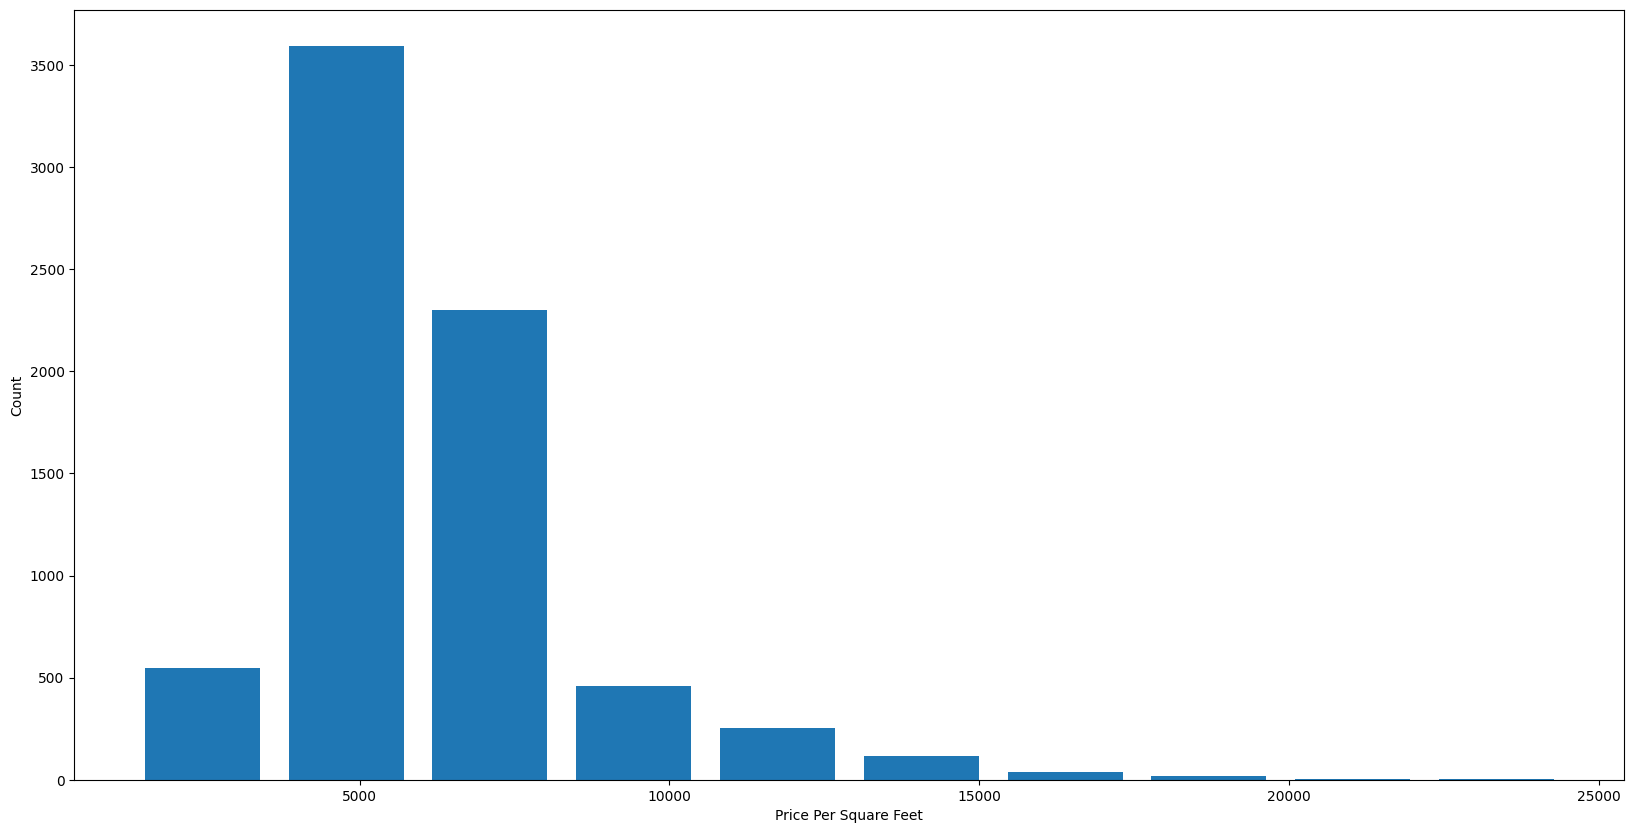

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [59]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [60]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [61]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [62]:
df8.shape

(7329, 7)

In [63]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(15)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0
5,1st Block Jayanagar,2750.0,4.0,413.0,4.0
6,1st Block Jayanagar,2450.0,4.0,368.0,4.0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3.0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5.0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3.0


In [64]:
dummies=pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df10.shape

(7251, 5)

In [66]:
df11=pd.concat([df10, dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df12.shape

(7251, 245)

In [69]:
x=df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
y=df12.price
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874286

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [74]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.742204,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [75]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [90]:
import numpy as np
import pandas as pd
import pickle
def predict_price(location, sqft, bath, bhk):
    with open('lr_model.pkl', 'rb') as f:
        lr_clf = pickle.load(f)
    with open('columns.pkl', 'rb') as f:
        columns = pickle.load(f)
    z = np.zeros(len(columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if location in columns:
        loc_index = np.where(columns == location)[0][0]
        z[loc_index] = 1
    input_df = pd.DataFrame([z], columns=columns)
    return lr_clf.predict(input_df)[0]


In [93]:
import pickle

with open('lr_model.pkl', 'rb') as f:
    model = pickle.load(f)

print(type(model))


<class 'sklearn.linear_model._base.LinearRegression'>


In [91]:
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)
with open('columns.pkl', 'wb') as f:
    pickle.dump(x.columns, f)


In [99]:
predicted_price = predict_price("Hebbal", 1000, 1, 1)
print(f"Predicted Price: ₹ {round(predicted_price, 2)} Lakhs")


Predicted Price: ₹ 67.92 Lakhs


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
rf_clf = RandomForestRegressor(random_state=42)
params = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
gs = GridSearchCV(rf_clf, params, cv=cv, n_jobs=-1)
gs.fit(x, y)
rf_clf = gs.best_estimator_
y_pred = rf_clf.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Random Forest RMSE on current data:", rmse)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)



Random Forest RMSE on current data: 16.864655715077447


In [84]:
def predict_price_rf(location, sqft, bath, bhk):
    import pandas as pd
    import numpy as np
    import pickle
    with open('rf_model.pkl', 'rb') as f:
        rf_clf = pickle.load(f)
    cols = x.columns
    z = np.zeros(len(cols))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if location in cols:
        loc_index = np.where(cols == location)[0][0]
        z[loc_index] = 1
    input_df = pd.DataFrame([z], columns=cols)
    return rf_clf.predict(input_df)[0]



In [102]:
predicted_price = predict_price_rf("Hebbal", 2000, 2, 3)
print(f"Predicted Price: ₹ {round(predicted_price, 2)} Lakhs")


Predicted Price: ₹ 168.03 Lakhs
